In [1]:
%matplotlib inline

In [2]:
cd /Users/anacriel/plant_seed_classification/

/Users/anacriel/plant_seed_classification


In [3]:
import os
import cv2
import numpy as np
import src.visualization.visualize as vs
import src.features.build_features as bfeatures
from matplotlib import pyplot as plt

In [4]:
cd /Users/anacriel/plant_seed_classification/src

/Users/anacriel/plant_seed_classification/src


In [5]:
data_dir = '../data/raw/'
image_path = data_dir + 'train/Common Chickweed/a38aa2204.png'

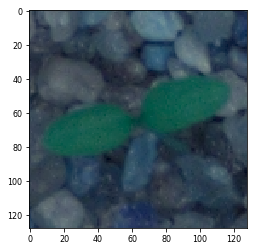

In [6]:
main_img = cv2.imread(image_path, cv2.IMREAD_COLOR)
plt.imshow(main_img)

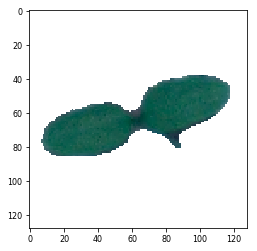

In [7]:
image_list = [main_img]
img_seg_list = vs.segment_plant(image_list, data_type='test', sharpen=True)
plt.imshow(img_seg_list[0])

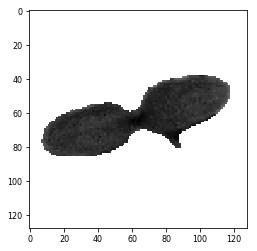

In [8]:
gs = cv2.cvtColor(img_seg_list[0], cv2.COLOR_RGB2GRAY)
plt.imshow(gs, cmap='Greys_r')

### Adaptive image thresholding using Otsu's thresholding method

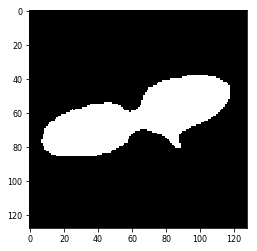

In [9]:
ret_otsu, im_bw_otsu = cv2.threshold(gs, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu, cmap='Greys_r')

### Closing of holes using Morphological Transformation

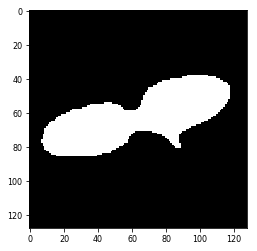

In [10]:
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing,cmap='Greys_r')

## Boundary extraction

### Boundary extraction using contours

In [11]:
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

len(contours)

1

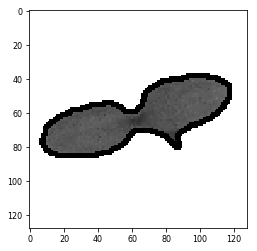

In [12]:
plottedContour = cv2.drawContours(gs,contours,-1,(0,255,0),2)
plt.imshow(plottedContour,cmap="Greys_r")

In [13]:
cnt = contours[0]
M = cv2.moments(cnt)
M

{'m00': 2699.5,
 'm10': 170965.0,
 'm01': 168646.8333333333,
 'm20': 13268359.75,
 'm11': 10025421.125,
 'm02': 10886796.916666666,
 'm30': 1143896528.6000001,
 'm21': 746218506.8333334,
 'm12': 608329408.7,
 'm03': 723527284.25,
 'mu20': 2440787.5236617886,
 'mu11': -655336.7415802293,
 'mu02': 350862.70908707567,
 'mu30': -5576930.419975996,
 'mu21': 307203.51181820035,
 'mu12': 727889.0152676702,
 'mu03': -446634.91410815716,
 'nu20': 0.33493714269036584,
 'nu11': -0.08992860443484943,
 'nu02': 0.04814714600061603,
 'nu30': -0.014729462415033402,
 'nu21': 0.0008113679462244263,
 'nu12': 0.0019224578908673148,
 'nu03': -0.0011796260102212442}

In [14]:
area = cv2.contourArea(cnt)
area

2699.5

In [15]:
perimeter = cv2.arcLength(cnt,True)
perimeter

291.52185916900635

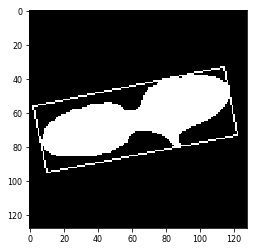

In [16]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
contours_im = cv2.drawContours(closing,[box],0,(255,255,255),1)
plt.imshow(contours_im,cmap="Greys_r")

In [17]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
aspect_ratio

2.3125

In [18]:
rectangularity = w*h/area
rectangularity

1.973698833117244

In [19]:
circularity = ((perimeter)**2)/area
circularity

31.48175379638969

In [20]:
equi_diameter = np.sqrt(4*area/np.pi)
equi_diameter

58.62687226018946

### Color based features

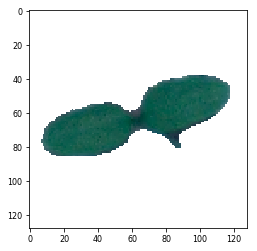

In [21]:
plt.imshow(img_seg_list[0],cmap="Greys_r")

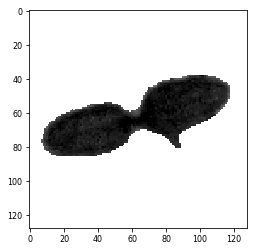

In [22]:
red_channel = img_seg_list[0][:,:,0]
plt.imshow(red_channel,cmap="Greys_r")

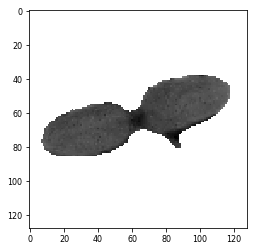

In [23]:
green_channel = img_seg_list[0][:,:,1]
plt.imshow(green_channel,cmap="Greys_r")

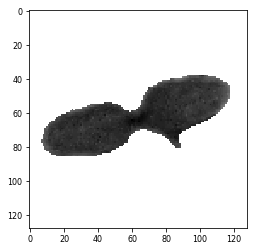

In [24]:
blue_channel = img_seg_list[0][:,:,2]
plt.imshow(blue_channel,cmap="Greys_r")

In [25]:
np.mean(blue_channel)

225.030517578125

In [26]:
blue_channel[blue_channel == 255] = 0
green_channel[green_channel == 255] = 0
red_channel[red_channel == 255] = 0

In [27]:
red_mean = np.mean(red_channel)
red_mean

4.068603515625

In [28]:
green_mean = np.mean(green_channel)
green_mean

15.736572265625

In [29]:
blue_mean = np.mean(blue_channel)
blue_mean

13.93646240234375

In [30]:
red_var = np.std(red_channel)
red_var

10.98955494875504

### Texture based features

In [31]:
import mahotas as mt

In [32]:
textures = mt.features.haralick(gs)
ht_mean = textures.mean(axis=0)
ht_mean

array([ 6.37341185e-01,  9.47424259e+02,  9.31930815e-01,  6.95542530e+03,
        8.74207351e-01,  4.28756200e+02,  2.68742769e+04,  1.81983753e+00,
        2.27392616e+00,  2.85048428e-03,  1.18945263e+00, -5.42028973e-01,
        9.02704930e-01])

In [33]:
print(ht_mean[1]) #contrast
print(ht_mean[2]) #correlation
print(ht_mean[4]) #inverse difference moments
print(ht_mean[8]) #entropy

947.4242588563301
0.9319308154189666
0.874207351111856
2.2739261591416935
